# Prediction of Test

In [136]:
pred_proba = rfc_classifier.predict_proba(X_test)[:, 1]
pred_proba

array([0.65668504, 0.17500496, 0.17803439, 0.15284452, 0.69068599,
       0.32954689, 0.09202381, 0.08854167, 0.52373819, 0.06375992,
       0.14152778, 0.05811219, 0.03483631, 0.65200409, 0.67248356,
       0.40246845, 0.20329816, 0.29724625, 0.23018001, 0.09061355,
       0.9016529 , 0.4372282 , 0.09190206, 0.026875  , 0.8031008 ,
       0.17418994, 0.84102294, 0.144794  , 0.2173566 , 0.0551034 ,
       0.20427846, 0.09947466, 0.11039141, 0.42052853, 0.74576686,
       0.30701846, 0.77931511, 0.1434405 , 0.04147727, 0.22796356,
       0.10669147, 0.54874229, 0.86459616, 0.6374162 , 0.24114235,
       0.3188834 , 0.11025603, 0.01572917, 0.21244584, 0.04441964,
       0.16376849, 0.54671563, 0.19383025, 0.78406576, 0.46250215,
       0.19458153, 0.13375992, 0.58649861, 0.        , 0.0713483 ,
       0.66190096, 0.2862237 , 0.08533654, 0.61438613, 0.08641865,
       0.31710705, 0.03487103, 0.09265873, 0.06690024, 0.07065476,
       0.52789763, 0.01950893, 0.48549442, 0.11886676, 0.60007

# Feature Importance

In [137]:
X_test.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [138]:
feat_imp = pd.DataFrame({"Variable": X_test.columns, 
                         "Importance": rfc_classifier.feature_importances_}).sort_values(
    by = "Importance", ascending= False).reset_index(drop = True)
feat_imp

,Variable,Importance
0,Credit amount,0.245658
1,Checking account,0.190060
2,Duration,0.157934
3,Age,0.156617
4,Purpose,0.067887
5,Saving accounts,0.065811
6,Job,0.058192
7,Housing,0.032308
8,Sex,0.025533


<AxesSubplot:ylabel='Variable'>

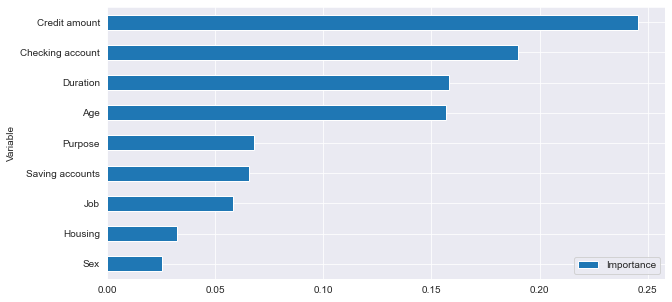

In [139]:
feat_imp.sort_values("Importance").plot("Variable", "Importance", "barh", figsize = (10, 5))

# Decision Making

### ROC curve

[0.         0.01041667 0.08333333 0.08333333 0.13541667 0.13541667
 0.15625    0.15625    0.21875    0.21875    0.23958333 0.23958333
 0.25       0.25       0.32291667 0.32291667 0.33333333 0.33333333
 0.35416667 0.35416667 0.375      0.375      0.38541667 0.38541667
 0.45833333 0.45833333 0.47916667 0.47916667 0.52083333 0.52083333
 0.54166667 0.54166667 0.5625     0.5625     0.58333333 0.58333333
 0.59375    0.59375    0.60416667 0.60416667 0.61458333 0.61458333
 0.64583333 0.64583333 0.65625    0.65625    0.66666667 0.66666667
 0.69791667 0.69791667 0.73958333 0.73958333 0.75       0.75
 0.77083333 0.77083333 0.78125    0.78125    0.79166667 0.79166667
 0.80208333 0.80208333 0.8125     0.8125     0.82291667 0.82291667
 0.84375    0.84375    0.85416667 0.85416667 0.86458333 0.86458333
 0.875      0.875      0.89583333 0.89583333 0.90625    0.90625
 0.91666667 0.91666667 0.92708333 0.92708333 0.9375     0.9375
 0.94791667 0.94791667 0.95833333 0.95833333 0.96875    0.96875
 0.97916667

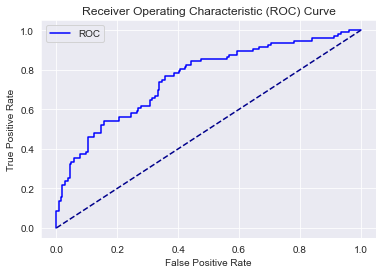

In [140]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(y_test, pred_proba, )
print(tpr)
print(fpr)
print(thresholds)

print(f"ROC-AUC: {roc_auc_score(y_test, pred_proba):.3f}")

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Threshold value is: {optimal_threshold:.3f}")

plot_roc_curve(fpr, tpr)

#### Therefore;

In [141]:
df_accept = pd.DataFrame({"Actual Test": y_test, "Probability of default": pred_proba})
df_accept

,Actual Test,Probability of default
545,1,0.656685
298,0,0.175005
109,0,0.178034
837,0,0.152845
194,1,0.690686
...,...,...
847,0,0.099562
682,0,0.013393
884,1,0.473602
325,0,0.095192


In [142]:
df_accept['Prediction'] = np.where(df_accept['Probability of default'] > optimal_threshold, 1, 0)

In [143]:
df_accept

,Actual Test,Probability of default,Prediction
545,1,0.656685,1
298,0,0.175005,0
109,0,0.178034,0
837,0,0.152845,0
194,1,0.690686,1
...,...,...,...
847,0,0.099562,0
682,0,0.013393,0
884,1,0.473602,1
325,0,0.095192,0


In [144]:
df_accept["accept or reject"] = np.where(df_accept["Prediction"] == 1, "reject", "accept")
df_accept = df_accept.reset_index(drop = True)
df_accept.head()

,Actual Test,Probability of default,Prediction,accept or reject
0,1,0.656685,1,reject
1,0,0.175005,0,accept
2,0,0.178034,0,accept
3,0,0.152845,0,accept
4,1,0.690686,1,reject


In [145]:
df_accept.tail()

,Actual Test,Probability of default,Prediction,accept or reject
295,0,0.099562,0,accept
296,0,0.013393,0,accept
297,1,0.473602,1,reject
298,0,0.095192,0,accept
299,0,0.398999,1,reject


In [146]:
pd.crosstab(df_accept['Actual Test'], df_accept['Prediction'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,131,73
1,23,73


In [147]:
pd.crosstab(df_accept['Actual Test'], df_accept['Prediction'], rownames = ['Actual'], colnames = ['Predicted']) / df_accept.shape[0]

Predicted,0,1
Actual,,
0,0.436667,0.243333
1,0.076667,0.243333


In [148]:
actual = df_accept["Actual Test"]
thresh_pred = df_accept["Prediction"]

print(classification_report(actual, thresh_pred))
print(confusion_matrix(actual, thresh_pred))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       204
           1       0.50      0.76      0.60        96

    accuracy                           0.68       300
   macro avg       0.68      0.70      0.67       300
weighted avg       0.74      0.68      0.69       300

[[131  73]
 [ 23  73]]


# Setting Cutoffs

In [149]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [150]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.901653,0.000000,0.000000
1,0.901653,0.000000,0.010417
2,0.787513,0.000000,0.083333
3,0.779315,0.009804,0.083333
4,0.737453,0.009804,0.135417


In [151]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [152]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.901653,0.000000,0.010417
2,0.787513,0.000000,0.083333
3,0.779315,0.009804,0.083333
4,0.737453,0.009804,0.135417


In [153]:
df_cutoffs.tail()

,thresholds,fpr,tpr
92,0.026875,0.936275,0.989583
93,0.020069,0.960784,0.989583
94,0.019509,0.960784,1.000000
95,0.005000,0.980392,1.000000
96,0.000000,1.000000,1.000000


In [154]:
df_accept.head()

,Actual Test,Probability of default,Prediction,accept or reject
0,1,0.656685,1,reject
1,0,0.175005,0,accept
2,0,0.178034,0,accept
3,0,0.152845,0,accept
4,1,0.690686,1,reject


In [155]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites less than the threshold. 
def n_approved(p):
    return np.where(df_accept['Probability of default'] <= p, 1, 0).sum()

In [156]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = X_test.shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_accept['Probability of default'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [157]:
df_cutoffs.iloc[40: , ]
# Here we display the dataframe with cutoffs form line with index 63 to line with index 69.

,thresholds,fpr,tpr,N Approved,N Rejected,Approval Rate,Rejection Rate
40,0.348150,0.279412,0.614583,185,115,0.616667,0.383333
41,0.318883,0.308824,0.614583,179,121,0.596667,0.403333
42,0.307018,0.308824,0.645833,176,124,0.586667,0.413333
43,0.306264,0.313725,0.645833,175,125,0.583333,0.416667
44,0.303543,0.313725,0.656250,174,126,0.580000,0.420000
45,0.299353,0.323529,0.656250,172,128,0.573333,0.426667
46,0.298840,0.323529,0.666667,171,129,0.570000,0.430000
47,0.297246,0.333333,0.666667,169,131,0.563333,0.436667
48,0.285731,0.333333,0.697917,166,134,0.553333,0.446667
49,0.283115,0.338235,0.697917,165,135,0.550000,0.450000


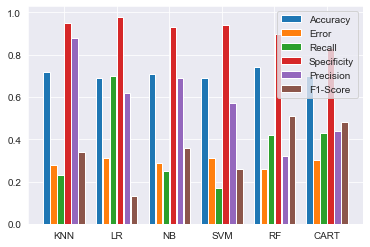

In [158]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    

    # Check if colors where provided, otherwhise use the default color cycle
    
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


if __name__ == "__main__":
    # Usage example:
    data = {
        "Accuracy": [0.72, 0.69, 0.71, .69, .74, .70], 
        "Error" : [0.28, 0.31, 0.29, .31, .26, .30], 
        "Recall": [0.23, 0.7, 0.25, .17, .42, .43], 
        "Specificity": [0.95, 0.98, 0.93, .94, .90, .83],
        "Precision": [0.88, 0.62, 0.69, .57, .32, .44],
        "F1-Score": [.34, .13, 0.36, .26, .51, .48]
}

    fig, ax = plt.subplots()
    bar_plot(ax, data, total_width=.8, single_width=.9)
    
    X = ['KNN','LR','NB', "SVM", "RF", "CART"]
    X_axis = np.arange(len(X))
    plt.xticks(X_axis, X)
    plt.show()
